# Euclidean TSP

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, random
from tqdm import tqdm

%matplotlib inline

In [2]:
class Route:
    '''
    Этот класс используется для хранения маршрута.
    В каждом экземпляре мы храним порядок следования городов и вес маршрута.
    '''
    def __init__(self, array = None, size = 0):
        self.list_ = array
        self.size_ = size
    
    def __index__(self, index):
        return self.list_[index]

In [3]:
class TravelingSalesmen:
    '''
    Класс для описания решения TSP.
    В конструкторе класса передается параметры Генетичемкого алгоритма и началный массив городов.
    Параметры алгоритма:
        gen_count - кол-во поколений, которые булет делать алгоритм.
        popul_size - кол-во возможных маршрутов, которые алгоритм будет использовать для ответа.
        retention - размер популяции, который хранится при отбраковке.
        mutation_rate - вероятность мутации
        route_ - места, которые мы хотим посетить.
    '''
    
    def __init__(self, gen_count_ = 1000, popul_size_ = 1000, retention = 0.2, mutation_rate_ = 0.01, route_ = []):
        self.population = []
        self.route = route_                      
        self.gen_count = gen_count_           
        self.retention = retention               
        self.popul_size = popul_size_     
        self.mutation_rate = mutation_rate_        
        self.best_rote = None                  
        
    def Generate(self):
        """
        Функция для генерации ответа.
        ответ сохраняется в best
        """
        self.CreatePopulation()
        for i in tqdm(range(0,self.gen_count)):
            self.Repopulate()
        self.SortPopulation()
        self.best_route = self.population[0]
        return self.best_route
            
    def CreatePopulation(self):
        """
        Алгоритм генерирует популяцию, рандомно перемешивая города в них.
        """
        copy_route = self.route[:]
        for i in range(0, self.popul_size):
            copy_route = self.route[:]
            random.shuffle(copy_route)
            self.population.append(Route(array=copy_route))
    
    def Repopulate(self):
        self.SortPopulation()
        self.ChangePopulation()
        self.Mutate()

    def SortPopulation(self):
        """
        Оценивает пригодность каждого маршрута и сортирует маршруты.
        """
        for citizen in self.population:
            self.CalculSize(citizen)
        self.population = sorted(self.population, key=lambda route: route.size_)

    def ChangePopulation(self):
        """
        Берет некоторое кол-во(определяется retention) верхних популяций
        и переделывает популяцию.
        Чтобы переделать популяцию, исполльзуется Crossover method:
            Возьмем 2 рандомных маршрута. Если их первая и вторая половины не совпадают,
            то возьмем первую половину и добавим к ней вторую половину второго маршрута.
            Добавим этот новый маршрут в популяцию. 
        """
        middle = int(len(self.route) / 2)
        fit_population = self.population[:int(math.floor(len(self.population) * self.retention))]
        new_population = fit_population[:]
        for i in range(len(self.population) - len(fit_population)):
            citizen1 = fit_population[random.randint(0, len(fit_population) - 1)]
            for i in range(0,(10 * len(fit_population))):
                citizen2 = fit_population[random.randint(0,len(fit_population) - 1)]
                if self.CheckCycle(citizen1, citizen2, middle) == True:
                    new_population.append(Route())
                    new_population[-1].list_ = citizen1.list_[:middle] + citizen2.list_[middle:]
                    self.population = new_population[:]
                    break
                elif(i == (10 * len(fit_population)) - 1):
                    new_population.append(Route())
                    new_population[-1].list_ = citizen1.list_
        self.population = new_population[:]

    def Mutate(self):
        """
        Мутация происходит таким образом, что мы меняем 2 рандомных элемента.
        Если число сгенерированное, меньше вероятности мутации.
        """
        for i in range(0,len(self.population)):
            if random.random() <= self.mutation_rate:
                index1 = random.randint(0,len(self.route)-1)
                index2 = random.randint(0,len(self.route)-1)
                self.population[i].list_[index1], self.population[i].list_[index2] = self.population[i].list_[index2], self.population[i].list_[index1]


    def CalculSize(self, route):
        """
        Оценивает пригодность маршрута.
        Пригодность маршрута-это его велечина, расчитанная по метрике R^2.
        """
        distance = 0
        len_ = len(self.route) - 1
        for i in range(0,len(self.route)):
            x_dist = abs(route.list_[i % len_][1] - route.list_[(i+1) % len_][1])
            y_dist = abs(route.list_[i % len_][2] - route.list_[(i+1) % len_][2])
            distance += math.sqrt(x_dist ** 2 + y_dist ** 2)
        route.size_ = distance

    def CheckCycle(self, route1, route2, ind):
        """
        Берет 2 маршрута и находит, нет ли цикла в них.
        """
        cut = int(ind)
        first_half = route1.list_[:ind]
        second_half = route2.list_[ind:]
        for i in first_half:
            if i in second_half:
                return False
        return True

В легенде к картинке перепутаны местами обозначения для оптимального пути и точек на плоскости

# Загрузим данные

In [88]:
data = open("test1.txt")
points = []
for line in data:
    n, x, y = line.split(" ")
    x = float(x)
    y = float(y)
    new_point = [" ", x, y]
    points.append(new_point)

## Так выглядит тест

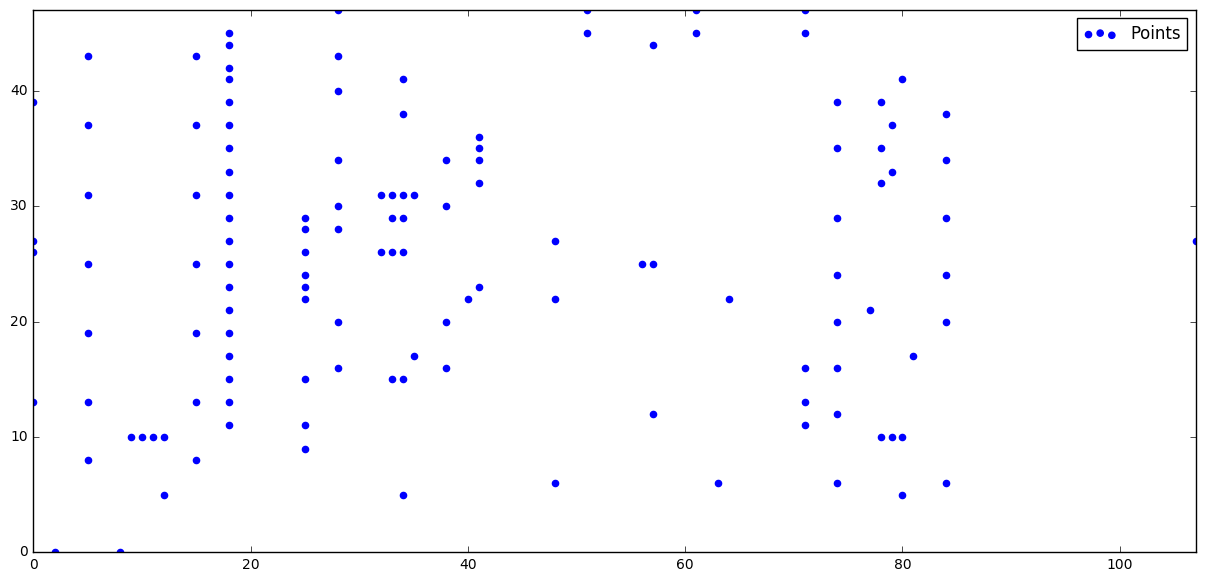

In [50]:
x = []
y = []
for _, x_i, y_i in points:
    x.append(x_i)
    y.append(y_i)
plt.figure(figsize=(15,7))
plt.scatter(x,y, label="Points", color="b")
plt.xlim((np.min(x), np.max(x)))
plt.ylim((np.min(y), np.max(y)))
plt.legend()
plt.show()

## Сделаем несколько запусков и посмотрим на лучший путь

In [119]:
ts = TravelingSalesmen(gen_count_=500, route_=points)

In [120]:
a = ts.Generate()

100%|██████████| 500/500 [03:58<00:00,  2.09it/s]


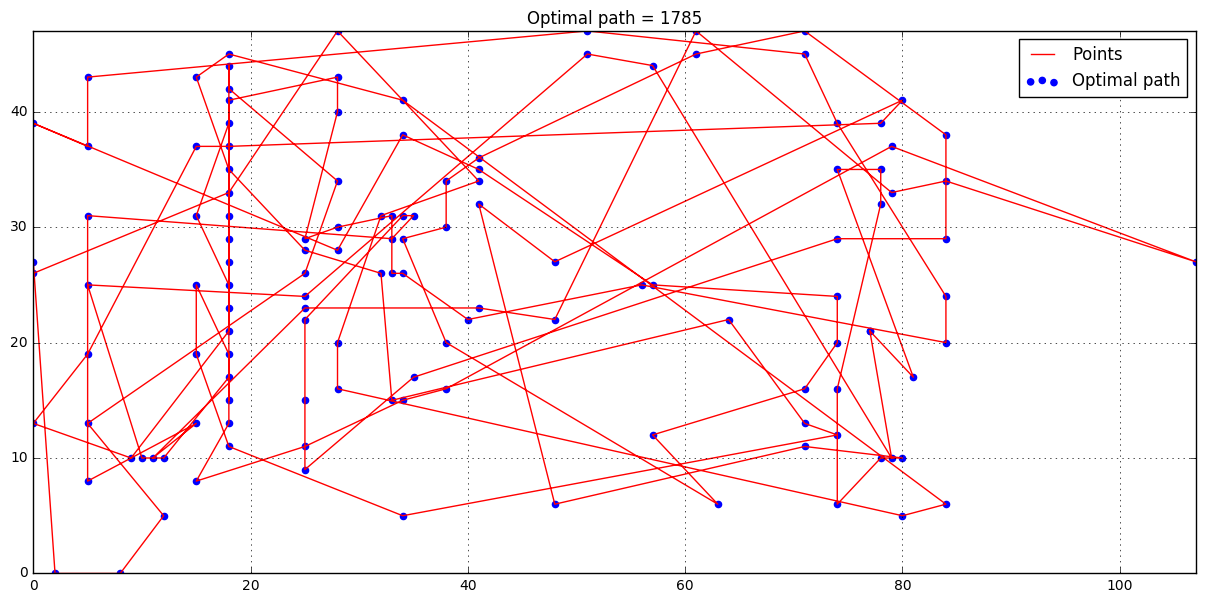

In [121]:
x = []
y = []
for _, x_i, y_i in a.list_:
    x.append(x_i)
    y.append(y_i)
x.append(a.list_[0][1])
y.append(a.list_[0][2])
plt.figure(figsize=(15,7))
plt.plot(x,y, color="r", label="Points")
plt.scatter(x,y, color="b", label="Optimal path")
plt.xlim((np.min(x), np.max(x)))
plt.ylim((np.min(y), np.max(y)))
plt.title('Optimal path = {}'.format(int(a.size_)))
plt.grid(ls=":")
plt.legend()
plt.show()

Каждый раз можно передавать улучшенный путь

In [122]:
ts = TravelingSalesmen(gen_count_=1000, route_=points)

In [123]:
a = ts.Generate()

100%|██████████| 1000/1000 [08:02<00:00,  2.07it/s]


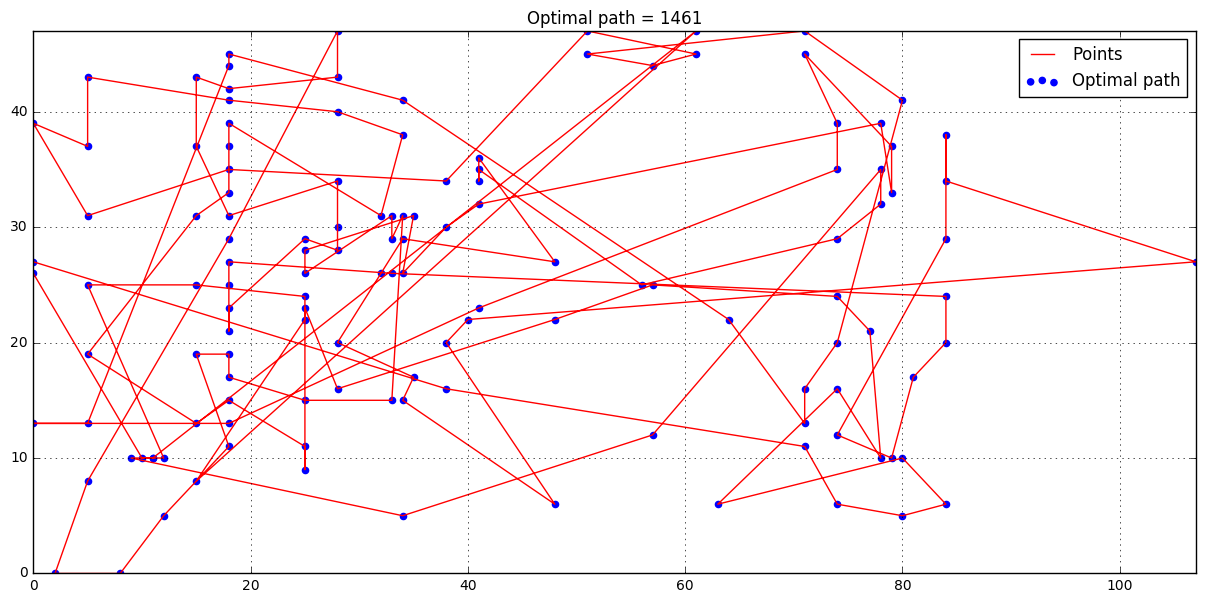

In [124]:
x = []
y = []
for _, x_i, y_i in a.list_:
    x.append(x_i)
    y.append(y_i)
x.append(a.list_[0][1])
y.append(a.list_[0][2])
plt.figure(figsize=(15,7))
plt.plot(x,y, color="r", label="Points")
plt.scatter(x,y, color="b", label="Optimal path")
plt.xlim((np.min(x), np.max(x)))
plt.ylim((np.min(y), np.max(y)))
plt.title('Optimal path = {}'.format(int(a.size_)))
plt.grid(ls=":")
plt.legend()
plt.show()

In [125]:
ts = TravelingSalesmen(gen_count_=5000, route_=points)
a = ts.Generate()

100%|██████████| 5000/5000 [30:32<00:00,  2.73it/s]


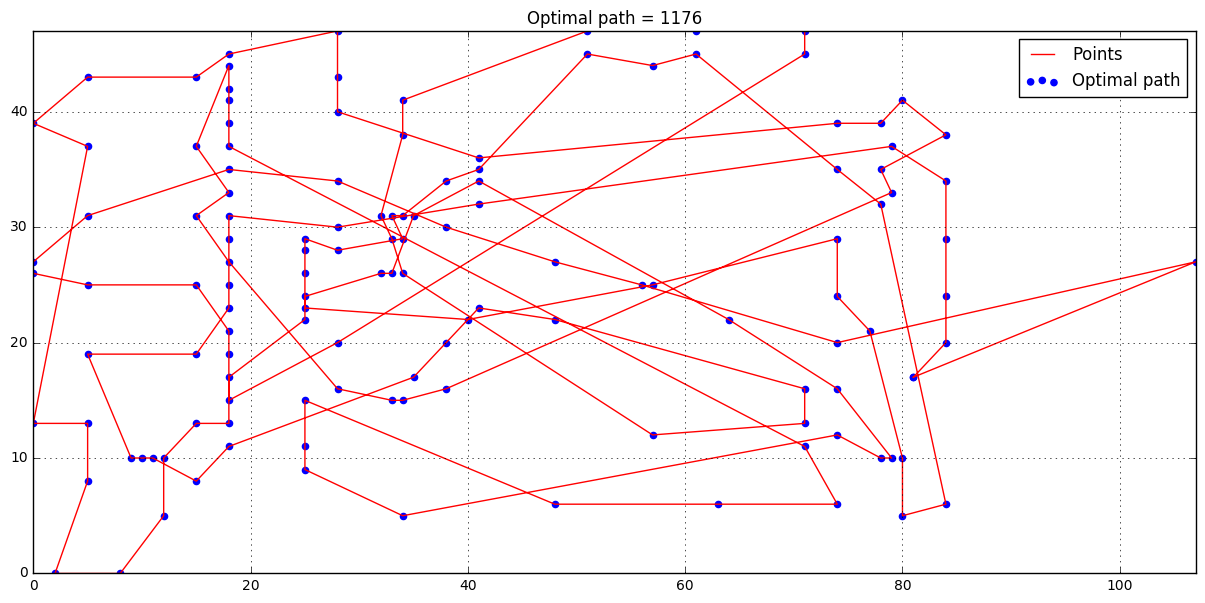

In [126]:
x = []
y = []
for _, x_i, y_i in a.list_:
    x.append(x_i)
    y.append(y_i)
x.append(a.list_[0][1])
y.append(a.list_[0][2])
plt.figure(figsize=(15,7))
plt.plot(x,y, color="r", label="Points")
plt.scatter(x,y, color="b", label="Optimal path")
plt.xlim((np.min(x), np.max(x)))
plt.ylim((np.min(y), np.max(y)))
plt.title('Optimal path = {}'.format(int(a.size_)))
plt.grid(ls=":")
plt.legend()
plt.show()

In [132]:
ts = TravelingSalesmen(gen_count_=10000, route_=points)
a = ts.Generate()

100%|██████████| 10000/10000 [1:01:08<00:00,  2.73it/s]


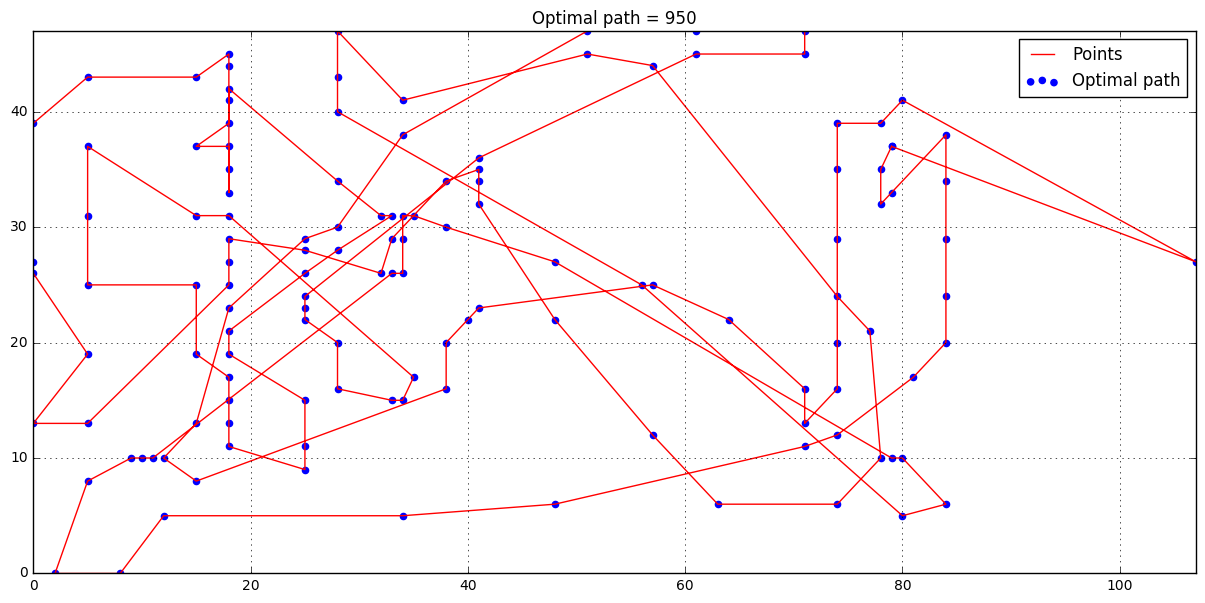

In [133]:
x = []
y = []
for _, x_i, y_i in a.list_:
    x.append(x_i)
    y.append(y_i)
x.append(a.list_[0][1])
y.append(a.list_[0][2])
plt.figure(figsize=(15,7))
plt.plot(x,y, color="r", label="Points")
plt.scatter(x,y, color="b", label="Optimal path")
plt.xlim((np.min(x), np.max(x)))
plt.ylim((np.min(y), np.max(y)))
plt.title('Optimal path = {}'.format(int(a.size_)))
plt.grid(ls=":")
plt.legend()
plt.show()

### Заметим, что с увеличением кол-ва популяций, мы добиваемся лучшего результата. Можно увидеть, как "распутывается клубок" и у маршрута становится меньше самопересечений. У оптимального маршрута их не должно быть вообще.

In [4]:
data = open("Luxembourg.txt")
points = []
for line in data:
    n, x_, y_ = line.split(" ")
    y = float(x_)
    x = float(y_)
    new_point = [n , x, y]
    points.append(new_point)

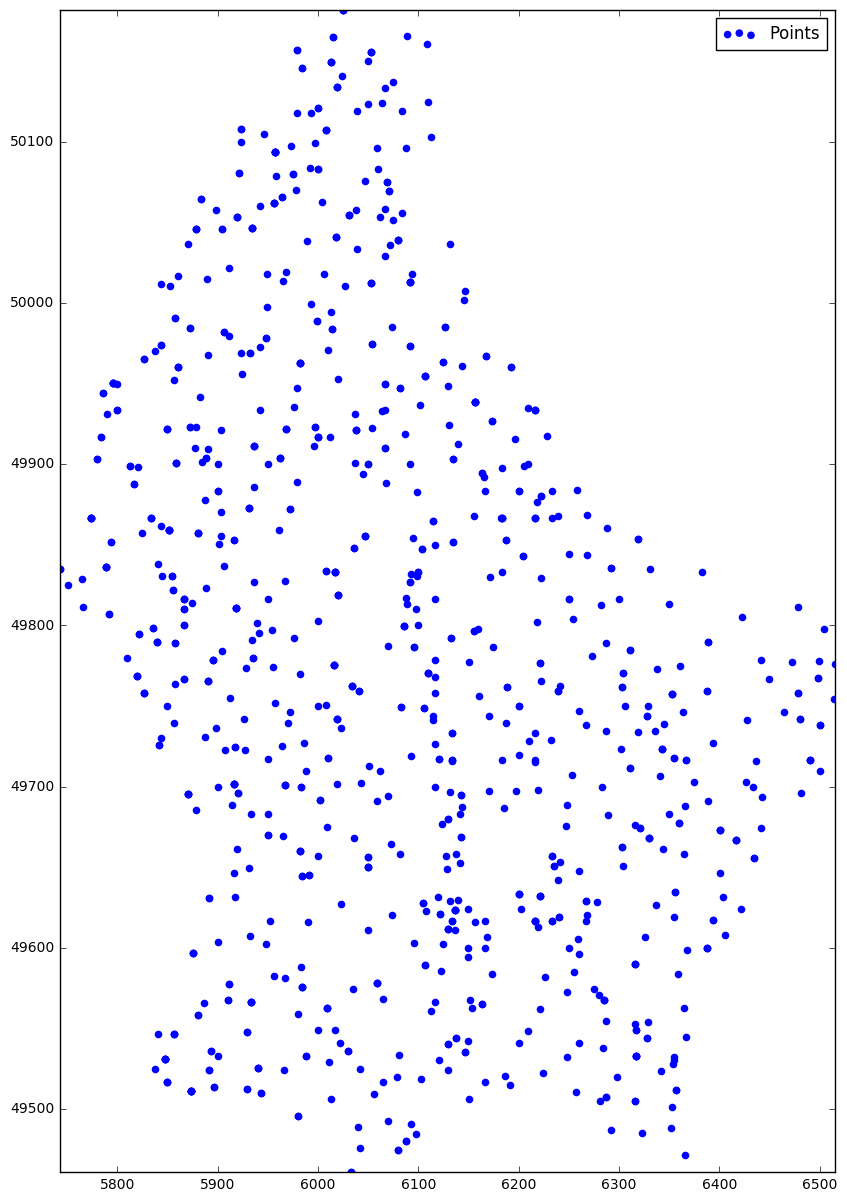

In [5]:
x = []
y = []
for _, x_i, y_i in points:
    # Нужно перевернуть картинку.
    x.append(x_i)
    y.append(y_i)
plt.figure(figsize=(10,15))
plt.scatter(x,y, label="Points", color="b")
plt.xlim((np.min(x), np.max(x)))
plt.ylim((np.min(y), np.max(y)))
plt.legend()
plt.show()

## Уменьшим кол-во популяций и их размер, так как точек стало много

In [6]:
ts = TravelingSalesmen(gen_count_=200, popul_size_=300, route_=points)
a = ts.Generate()

100%|██████████| 200/200 [15:41<00:00,  4.71s/it]


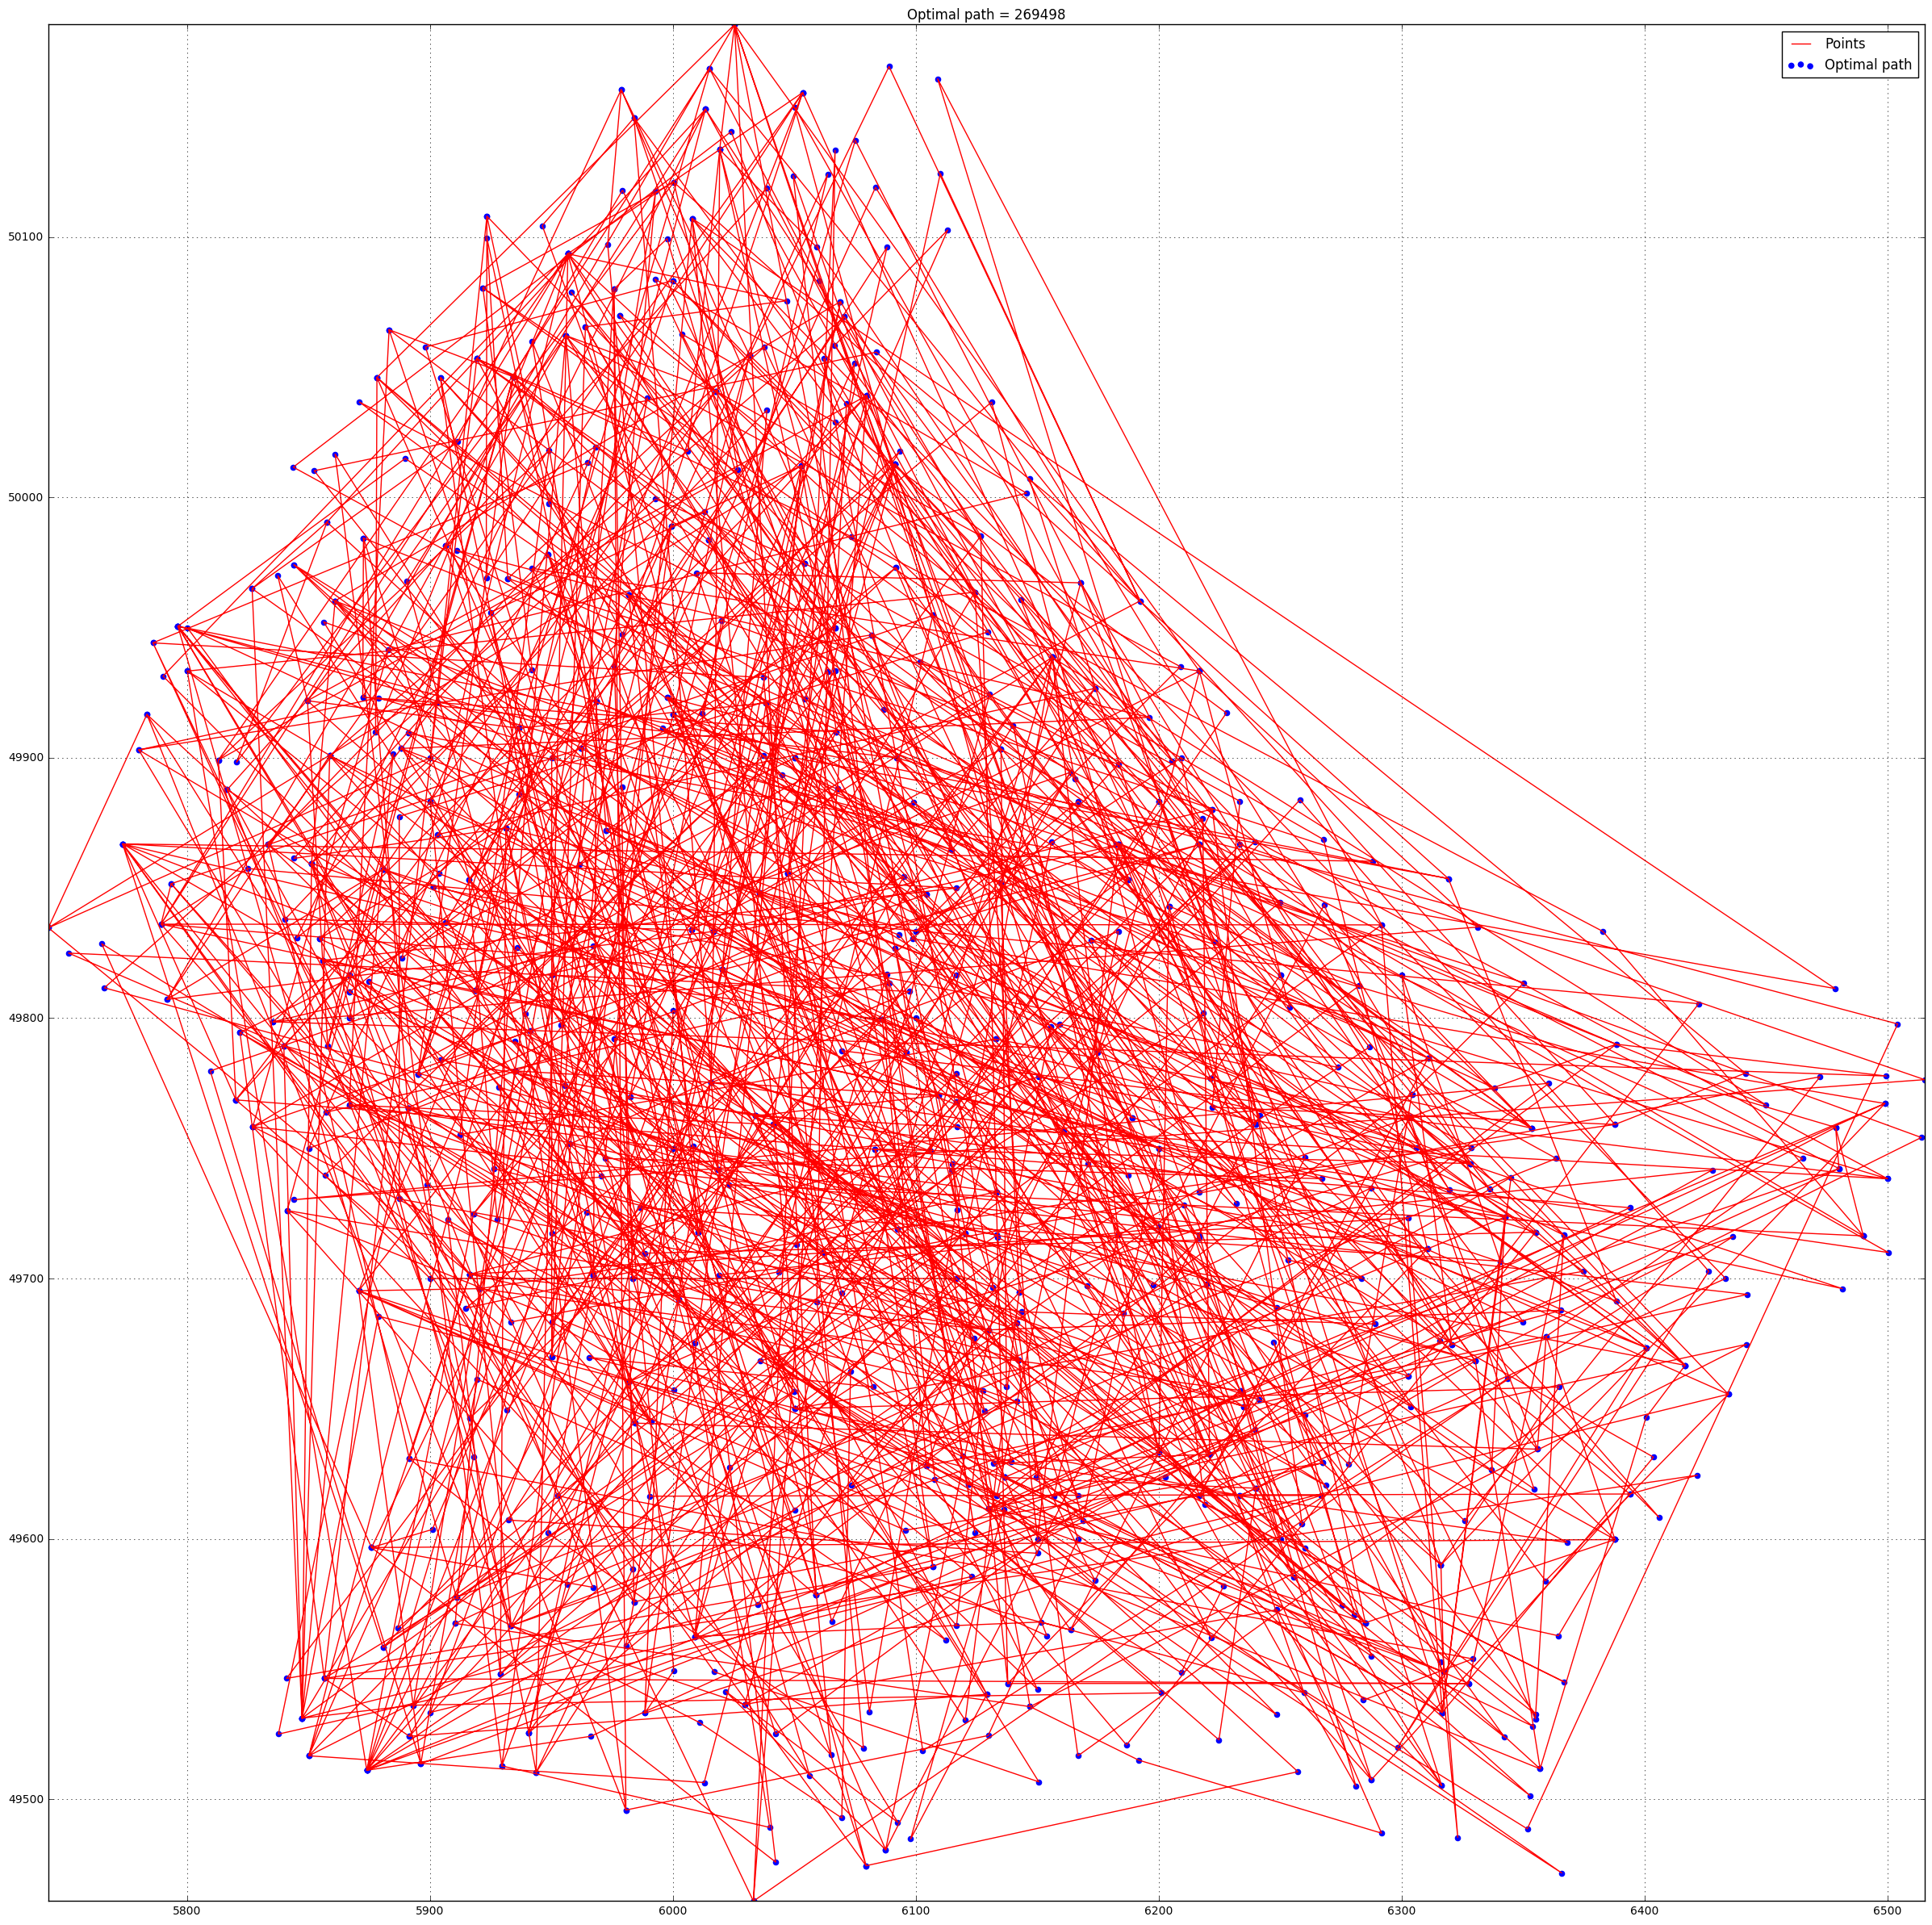

In [8]:
x = []
y = []
for _, x_i, y_i in a.list_:
    x.append(x_i)
    y.append(y_i)
x.append(a.list_[0][1])
y.append(a.list_[0][2])
plt.figure(figsize=(30,30))
plt.plot(x,y, color="r", label="Points")
plt.scatter(x,y, color="b", label="Optimal path")
plt.xlim((np.min(x), np.max(x)))
plt.ylim((np.min(y), np.max(y)))
plt.title('Optimal path = {}'.format(int(a.size_)))
plt.grid(ls=":")
plt.legend()
plt.show()

In [9]:
ts = TravelingSalesmen(gen_count_=1000, popul_size_=300, route_=points)
a = ts.Generate()

100%|██████████| 1000/1000 [1:19:33<00:00,  4.77s/it]


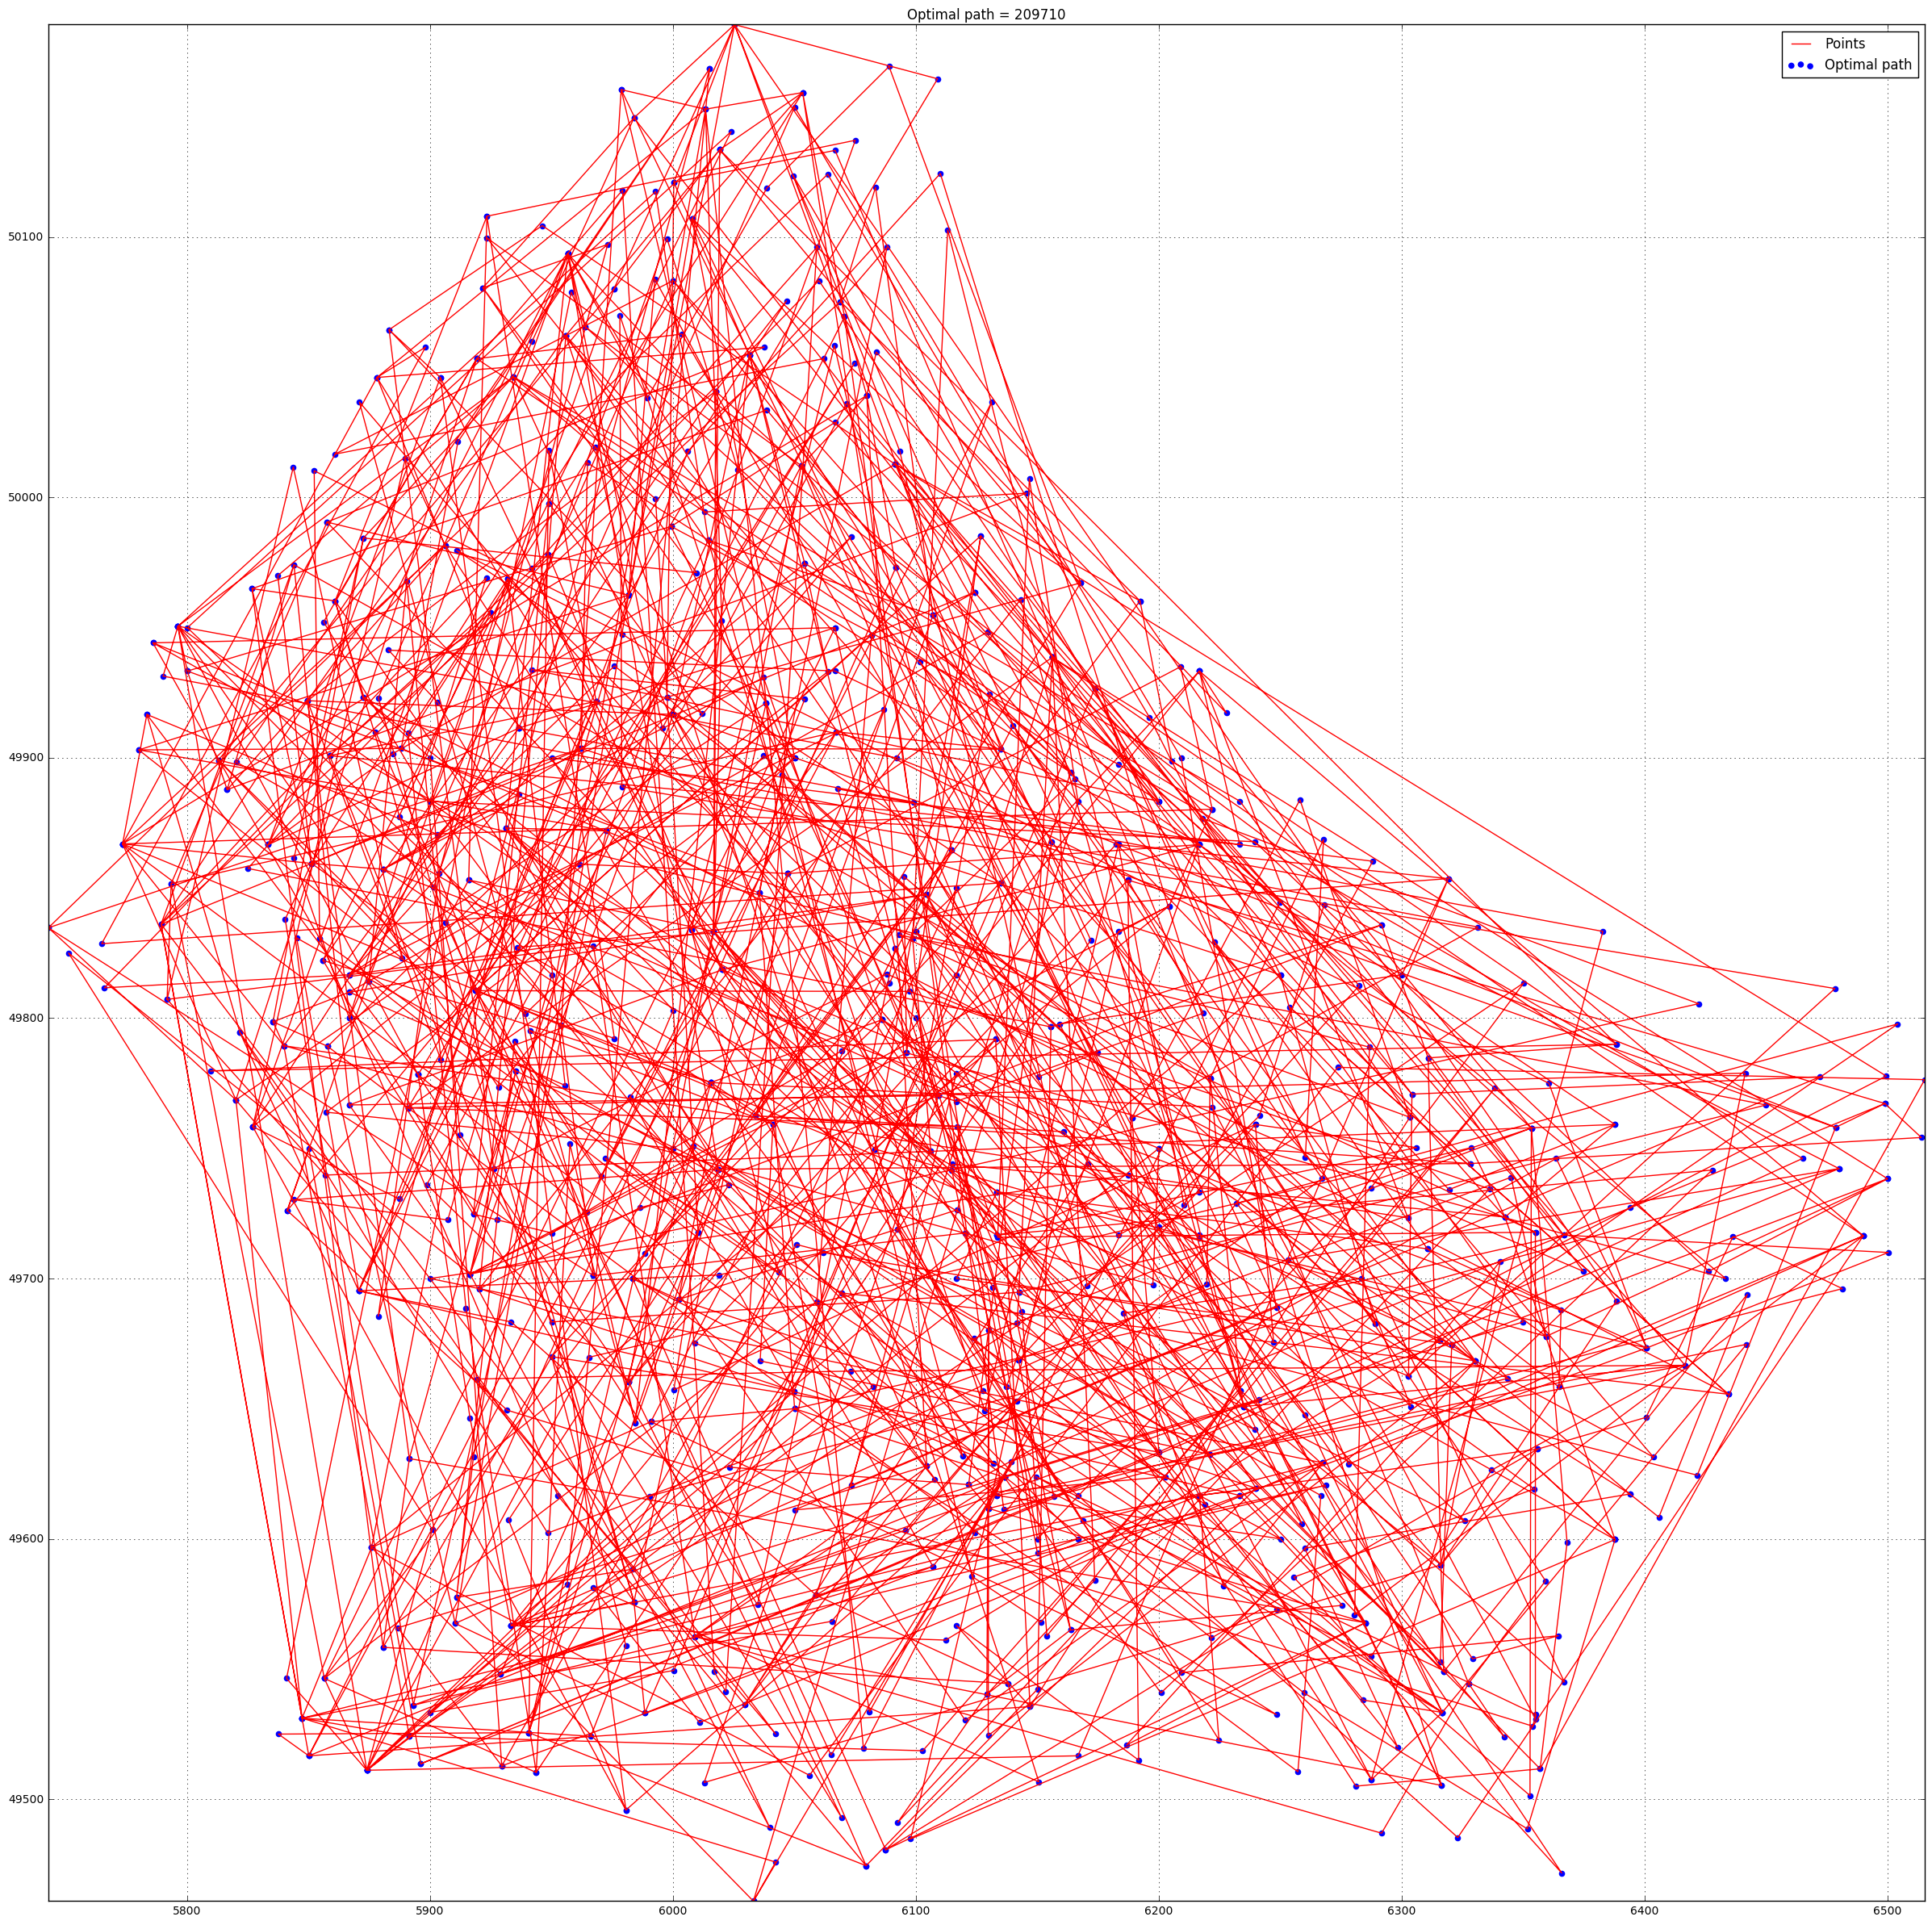

In [10]:
x = []
y = []
for _, x_i, y_i in a.list_:
    x.append(x_i)
    y.append(y_i)
x.append(a.list_[0][1])
y.append(a.list_[0][2])
plt.figure(figsize=(30,30))
plt.plot(x,y, color="r", label="Points")
plt.scatter(x,y, color="b", label="Optimal path")
plt.xlim((np.min(x), np.max(x)))
plt.ylim((np.min(y), np.max(y)))
plt.title('Optimal path = {}'.format(int(a.size_)))
plt.grid(ls=":")
plt.legend()
plt.show()

На большем кол-ве точек алгоритм работает дольше. На этом примере мы видим ту же тенденцию: с увеличением кол-ва популяций мы все ближе подходим к оптимальному решению